<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Print-three-isobars-on-a-(temp,theta)-grid" data-toc-modified-id="Print-three-isobars-on-a-(temp,theta)-grid-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Print three isobars on a (temp,theta) grid</a></span><ul class="toc-item"><li><span><a href="#Now-repeat-using-the-matplotlib-contour-function" data-toc-modified-id="Now-repeat-using-the-matplotlib-contour-function-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Now repeat using the matplotlib contour function</a></span></li></ul></li></ul></div>

In [1]:
import numpy as np
from matplotlib import pyplot as plt

def theta_from_temp(temp,press):
    """
       Input: temp (K)
               press (kPa)
       Output: theta (K)
       Thompkins eq. 1.38
    """
    cpd=1004. #J/kg/K
    Rd = 287.  # J/kg/K
    p0 = 100   #kPa
    theta = temp*(p0/press)**(Rd/cpd)
    return theta


def press_from_temp_theta(temp,theta):
    """
       Input: temp (K)
              theta (K)
       Output: press (kPa)
       Thompkins eq. 1.38
    """
    cpd=1004. #J/kg/K
    Rd = 287.  # J/kg/K
    p0 = 100   #kPa
    press = p0*(temp/theta)**(cpd/Rd)
    return press

## Print three isobars on a (temp,theta) grid

Start by simply drawing line of conatant pressure on a temperature, $\theta$ plot, similar to Thompkins Figure 1.9

In [2]:
press=[100,80,60]  #our isobars
temp=np.linspace(250,300,40)  #temperature range
save_lines=[]
#
# loop over the
#
for the_press in press:
    save_lines.append(theta_from_temp(temp,the_press))

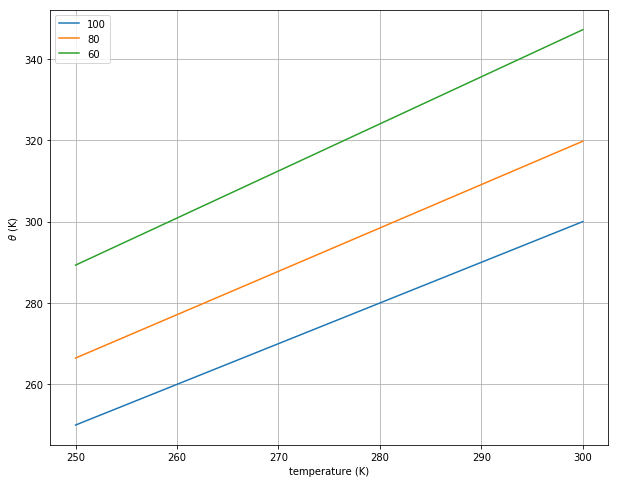

In [9]:
%matplotlib inline
pairs=zip(press,save_lines)
fig,ax=plt.subplots(1,1,figsize=(10,8))
for the_press,theta in pairs:
    ax.plot(temp,theta,label=the_press)
ax.grid(True)
out=ax.legend()
ax.set_xlabel('temperature (K)')
ax.set_ylabel(r'$\theta$ (K)');

### Now repeat using the matplotlib contour function

So how do we get lines with labels in the middle of the line?  This is handled by the 
matplotlib contour function.
Instead of plotting three isobars, make a grid of pressure values and then put
down 3 contour lines on that grid.  Write the contour labels over the lines

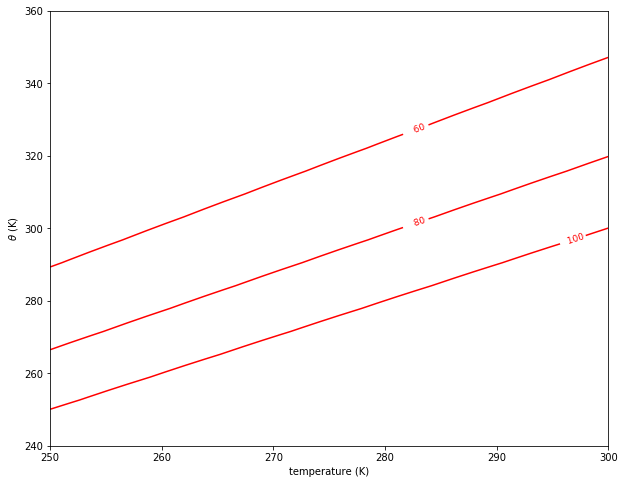

In [10]:
grid=np.empty([20,30])  #make this 20 rows (theta,yaxis) with 30 columns (temperature, xaxis)
temp_vals=np.linspace(250,300,30)
theta_vals=np.linspace(240,360,20)
rows,cols=grid.shape
for i in range(rows):
    for j in range(cols):
        grid[i,j]=press_from_temp_theta(temp_vals[j],theta_vals[i])
        #print(i,j,temp_vals[j],theta_vals[i],grid[i,j])
        
fig,ax=plt.subplots(1,1,figsize=(10,8))
press_labels=[60,80,100]
#
# note that even though temperature is on the y axis, it is the first
# value passed to contour.  This is because rows run along the y axis
#
presslevs=ax.contour(temp_vals,theta_vals,grid,press_labels,colors='r')
fntsz = 9 # Handle for 'fontsize' of the line label.
ovrlp = True # Handle for 'inline'. Any integer other than 0
                # creates a white space around the label.
out=presslevs.clabel(press_labels, inline_spacing=0, 
                     inline=ovrlp, fmt='%5d', fontsize=fntsz,use_clabeltext=True)
ax.set_xlabel('temperature (K)')
ax.set_ylabel(r'$\theta$ (K)');